# **Introduction to Machine Learning : Lab 02** 

This lab is designed to give you an insight into how to make an **autoencoder model to detect anomaly** in your dataset.


The dataset can be downloaded from the following [link](https://data.mendeley.com/datasets/fddp3dvvzr/1). 


**Autoencoder**

> An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.


To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.




# **1. Import the essential libraries**

For example:

import numpy as np

you should import the related libraries from Keras and Tensorflow in order to make your own **Model**

In [1]:
import numpy as np

import tensorflow as tf

print(tf.__version__)

from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Conv2D, Dropout, Conv2DTranspose, Input
from sklearn.model_selection import train_test_split

import pandas as pd

#your code

2.12.0


# **2. Load the dataset**



**Download the dataset (there is three .csv file) set and load it from your local drive.** 

*BarrelMovement.csv* contains parameter readings from barrel pick and place movement. Similarly, *SpringMovement_Converged.csv* and *SpringMovement_withTransientData.csv* contain parameter readings for spring pick and place movement. 


In [2]:
# reading the CSV file

csvFile = pd.read_csv('BarrelMovement.csv')
#csvFile = pd.read_csv('SpringMovement_Converged.csv')
#csvFile = pd.read_csv('SpringMovement_withTransientData.csv')
column= ['p0', 'p1', 'p2', 'p3', 'p4','p5', 'p6', 'p7', 'p8','p9', 'p10']
csvFile.dropna(axis = 0, how = 'any', inplace = True)

DeltaParameters_sm = pd.DataFrame(csvFile, columns=column)



In [3]:
# PreProcessing
# clean the dataset, there most be some NAN values in the Dataframe, you should try to remove them (Hint; you can use 'dropna' function from 'Dataframe Pandas')

DeltaParameters_sm.dropna()

DeltaParameters_sm

p0        p1        p2        p3        p4        p5        p6  \
0    0.000094  0.000492  0.099973  0.003982  0.004947  0.003061  0.000405   
1    0.000086  0.000500  0.099989  0.003945  0.004916  0.003118  0.000379   
2    0.000125  0.000450  0.100005  0.003935  0.004900  0.003164  0.000380   
3    0.000098  0.000400  0.100014  0.003869  0.004960  0.003264  0.000374   
4    0.000098  0.000348  0.100050  0.003869  0.004960  0.003264  0.000374   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.000099  0.000292  0.099742  0.004056  0.004795  0.003322  0.000441   
896  0.000099  0.000204  0.099667  0.004056  0.004795  0.003322  0.000441   
897  0.000113  0.000222  0.099661  0.003994  0.004785  0.003302  0.000421   
898  0.000117  0.000340  0.099710  0.003985  0.004749  0.003268  0.000421   
899  0.000114  0.000410  0.099777  0.003944  0.004763  0.003273  0.000412   

           p7        p8        p9       p10  
0    0.000428  0.000739  0.025763  0.018058  
1    0.000426  0.000750  0.025755  0.018106  
2    0.000424  0.000764  0.025801  0.018073  
3    0.000423  0.000785  0.025850  0.018197  
4    0.000423  0.000785  0.025906  0.018369  
..        ...       ...       ...       ...  
895  0.000436  0.000761  0.025903  0.019054  
896  0.000436  0.000761  0.025962  0.018953  
897  0.000440  0.000760  0.025918  0.018776  
898  0.000440  0.000759  0.025806  0.018660  
899  0.000442  0.000759  0.025749  0.018645  

[900 rows x 11 columns]

# Normalization

After gathering datasets for different tasks of the delta robot, the first step is to normalize the data to remove the effects of scaling in the data. Data normalization can be calculated as follows

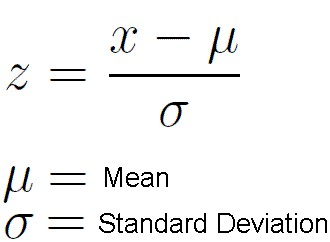



In [4]:
# Normalize the data


training_bm_mean = DeltaParameters_sm.mean()
print(training_bm_mean)

training_bm_std = DeltaParameters_sm.std()
print(training_bm_std)
df_training_bm_value = (DeltaParameters_sm - training_bm_mean) / training_bm_std

print("Number of training samples:", len(df_training_bm_value))


print(df_training_bm_value.describe())

print(df_training_bm_value.median())


p0     0.000097
p1     0.000258
p2     0.099827
p3     0.004047
p4     0.004894
p5     0.003076
p6     0.000402
p7     0.000416
p8     0.000759
p9     0.025845
p10    0.018498
dtype: float64
p0     0.000024
p1     0.000174
p2     0.000140
p3     0.000096
p4     0.000086
p5     0.000175
p6     0.000033
p7     0.000018
p8     0.000018
p9     0.000180
p10    0.000652
dtype: float64
Number of training samples: 900
                 p0            p1            p2            p3            p4  \
count  9.000000e+02  9.000000e+02  9.000000e+02  9.000000e+02  9.000000e+02   
mean   1.589346e-15 -5.903919e-16 -7.195735e-13  6.821457e-15 -2.059414e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.627778e+00 -1.481337e+00 -3.719112e+00 -2.261669e+00 -2.644503e+00   
25%   -6.281129e-01 -8.960749e-01 -5.927632e-01 -7.463767e-01 -7.346681e-01   
50%    1.791391e-01  8.103805e-03  8.248947e-02 -1.039738e-01  1.647813e-01   
75%    7.580936e-01  7.315793e-01

# Data Visualization

Show the first 10 rows in the datset

In [5]:
# visualization

df_training_bm_value.head(5)


p0        p1        p2        p3        p4        p5        p6  \
0 -0.095098  1.340430  1.042009 -0.673759  0.617287 -0.085540  0.065528   
1 -0.430588  1.387384  1.150647 -1.064571  0.251995  0.241501 -0.720076   
2  1.200912  1.102553  1.265285 -1.161933  0.065657  0.505113 -0.677835   
3  0.069093  0.816252  1.328840 -1.854350  0.767177  1.073228 -0.852088   
4  0.069093  0.514731  1.584877 -1.854350  0.767177  1.073228 -0.852088   

         p7        p8        p9       p10  
0  0.692566 -1.073737 -0.456626 -0.675700  
1  0.598248 -0.474157 -0.497932 -0.600868  
2  0.484802  0.261248 -0.242496 -0.652087  
3  0.429568  1.397862  0.026930 -0.461651  
4  0.429568  1.397862  0.341058 -0.197593

# Split the test and Train data

In [6]:
# your code

X_train, X_test = train_test_split(df_training_bm_value, test_size=0.2, random_state=1,shuffle=True)

X_test

p0        p1        p2        p3        p4        p5        p6  \
860 -0.423229  0.755954  0.666239  0.324147 -0.979023 -0.998986 -0.924514   
880 -0.305699  0.832810 -0.401915  0.061877 -1.041942 -0.621455 -0.608007   
874  0.324683 -1.481337 -1.418779  0.650860 -2.043878  0.520942  0.904583   
780 -0.790078  0.174931 -0.956727  0.638874  0.373331 -0.682880  1.124703   
525 -0.428498  0.719282  1.555508 -0.723997 -0.295618 -0.290177 -0.840878   
..        ...       ...       ...       ...       ...       ...       ...   
422 -0.101495 -1.481337 -1.073489  0.205197  0.901453  0.269024  1.797331   
830  0.758930 -0.779861 -2.728794 -0.261410 -2.053543 -1.002133  0.048577   
106 -1.038768 -1.329702 -1.187913  0.170257 -0.806135 -0.651759  0.896304   
23  -0.202217  1.690873  1.250683 -0.785659  1.443881  0.778290 -0.676475   
69   0.963259  0.388489  0.551230 -1.356064  1.282567 -0.594497 -0.671308   

           p7        p8        p9       p10  
860  3.074651 -0.273825 -1.829552  0.031685  
880  2.262339 -1.246937 -0.601313 -0.392240  
874  1.412323  0.106027  1.768925  0.572130  
780 -0.042461 -2.446315 -0.418649  0.374974  
525  1.225948 -0.204359 -0.067222  0.326675  
..        ...       ...       ...       ...  
422 -0.995725 -0.029743  0.547665 -0.165049  
830  0.451177 -0.142849  0.288162 -1.364545  
106 -0.880570  0.507291  1.015025 -1.282777  
23   0.308570 -0.520358 -0.334215  0.183996  
69  -0.590837 -0.878254 -0.972149 -1.182792  

[180 rows x 11 columns]

In [7]:
print(X_train.shape)
#The input data has the following dimensions: (num. of samples, sequence length, num. of parameters, 1)
#X_train = np.array(X_train).reshape(-1, 11, 1)
#print(X_train.shape)
#X_test = np.array(X_test).reshape(-1, 11, 1)
#print(X_test.shape)

x_train = np.array(X_train).reshape(int(X_train.shape[0]), X_train.shape[1], 1)
print(f"x_train shape: {x_train.shape}")


(720, 11)
x_train shape: (720, 11, 1)


# **3. Build your Autoencoder Model**

create a function or class for Autoencoder model which contains an **Encoder** and a **Decoder** part. 

Based on the paper, you can create your initial Model as follows:

*Basic Structure consist of the following layers*


*   Convolution with 32 filters and kernel size of 4 × 4
*   Dropout
*   Convolution with 16 filters and kernel size of 12 × 12
*   Transpose (a.k.a. deconvolution) with 16 filters and kernel size of 12 × 12
*   Dropout
*   Transpose with 32 filters and kernel size of 4 × 4


In [8]:
from tensorflow.keras import layers
# The input data has the following dimensions: (num. of samples, num. of parameters, 1)
# As indicated in the paper, num. of parameters is 11

print(tf.__version__)

def AutoEncoder(X_train):
  model = keras.Sequential(
    [
        layers.Conv1D(
            filters=32, kernel_size=4, padding="same", activation="relu",input_shape=(x_train.shape[1], 1)
        ),
        Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=12, padding="same", activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=12, padding="same", activation="relu"
        ),
        Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=4, padding="same", activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=14, padding="same"),
    ]
  )
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
  model.summary()
  
  #your_code
  
  return model

2.12.0


In [9]:
# show a summary of your network
model = AutoEncoder(x_train)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 32)            160       
                                                                 
 dropout (Dropout)           (None, 11, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 16)            6160      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 11, 16)           3088      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 11, 16)            0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 11, 32)           2080      
 ranspose)                                              

# **4. Train your Network**

train your network and try to use different number for epoch and batch_size

In [10]:
# train the network
num_epochs = 20
batch_size = 10

history = model.fit(x_train, x_train,
                epochs=num_epochs,
                shuffle=True,
                validation_split=0.1)

Epoch 1/20
21/21 [==============================] - 3s 30ms/step - loss: 0.7855 - val_loss: 0.2853
Epoch 2/20
21/21 [==============================] - 0s 10ms/step - loss: 0.2673 - val_loss: 0.1161
Epoch 3/20
21/21 [==============================] - 0s 11ms/step - loss: 0.1664 - val_loss: 0.0660
Epoch 4/20
21/21 [==============================] - 0s 10ms/step - loss: 0.1258 - val_loss: 0.0393
Epoch 5/20
21/21 [==============================] - 0s 10ms/step - loss: 0.1053 - val_loss: 0.0264
Epoch 6/20
21/21 [==============================] - 0s 10ms/step - loss: 0.0942 - val_loss: 0.0204
Epoch 7/20
21/21 [==============================] - 0s 10ms/step - loss: 0.0881 - val_loss: 0.0169
Epoch 8/20
21/21 [==============================] - 0s 10ms/step - loss: 0.0812 - val_loss: 0.0197
Epoch 9/20
21/21 [==============================] - 0s 10ms/step - loss: 0.0792 - val_loss: 0.0128
Epoch 10/20
21/21 [==============================] - 0s 10ms/step - loss: 0.0764 - val_loss: 0.0140
Epoch 11/

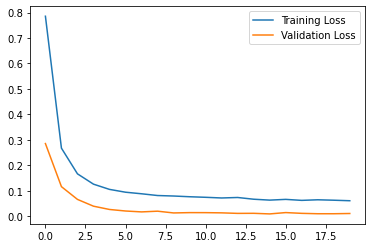

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

# **5. Test the network**

For Testing , you should make a noise signal and add it to your data, then use the 'Predict' function to detect the anomaly in the data. 
As an example, create an impaired signal sequence of length 4 at 45, 85 and 110 indices. (see the example below)

(180, 11)
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4
 1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1
 2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75 2.8
 2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45 3.5
 3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15 4.2
 4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85 4.9
 4.95 5.   5.05 5.1  5.15 5.2  5.25 5.3  5.35 5.4  5.45 5.5  5.55 5.6
 5.65 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05 6.1  6.15 6.2 ]


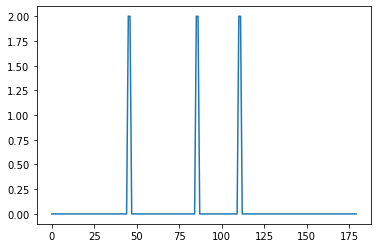

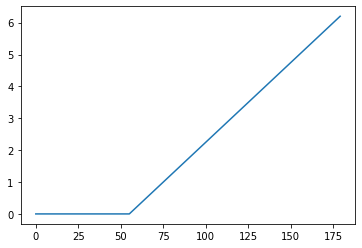

(180, 11)


In [24]:
# Add a disturbance to your test dataset and create a new test dataset
import matplotlib.pyplot as plt

# your code
#  disturbance occur at distLoc (indices) 
x = np.linspace(0,179, 180)
distLoc = [45, 85,110]
NoiseLength = 2 # 4
Step1 = 2
def u(x, distLoc):
    unit_step = np.zeros(x.shape[0])
    i=0
    for i in range(0,3):
      #print(t[place])
      if x[distLoc[i]]:
        unit_step[distLoc[i]] = Step1
        for j in range(1,NoiseLength):
          unit_step[(distLoc[i]+j)] = Step1
    return unit_step  

yy= u(x, distLoc)
yy     

plt.plot(yy)
Noise= []
for i in range(0,11):
  Noise.append(yy)
Noise= np.array(Noise).T
print (Noise.shape)

########################################
## Add linear noise ##
linnoise = np.roll(0.05*np.linspace(0,179,180), 55)
linnoise[:55] = 0
print(linnoise)
plt.figure()
plt.plot(linnoise)
plt.savefig('C:\\Users\\dejol\\Desktop\\3 Jahr\\Semester6\\PA FS23\\Ressourcen\\Plots\\old_Linnoise_actuall.png', dpi=300)
plt.show()

LinNoise= []
for i in range(0,11):
  LinNoise.append(linnoise)
LinNoise= np.array(LinNoise).T
print (LinNoise.shape)

########################################


In [13]:
# Add the disturbance to data
print(X_test.shape)
#x_noisy_test = X_test + Noise
########################################
x_noisy_test = X_test + LinNoise 
########################################


(180, 11)


In [14]:
# Reshape due be fit to the network input
x_test_noisy2 = np.array(x_noisy_test).reshape(int(x_noisy_test.shape[0]), x_noisy_test.shape[1], 1)
X_test2 = np.array(X_test).reshape(int(X_test.shape[0]), X_test.shape[1], 1)
print(f"x_test shape: {x_test_noisy2.shape}")

x_test shape: (180, 11, 1)


Root Mean Squared Error (RMSE)and Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. These metrics tell us how accurate our predictions are and, what is the amount of deviation from the actual values.

**Mean Absolute Error (MAE):** MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.



6/6 [==============================] - 0s 5ms/step
clean error [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
MAE general [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 3.
 2. 2. 3. 3

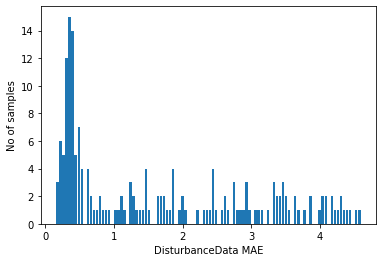

In [15]:
plt.figure()
predict = model.predict(X_test2)

predict2 = model.predict(x_test_noisy2)
test_Noise_mae = np.mean(np.linalg.norm(np.abs(x_test_noisy2 - predict2), axis=1), axis=1)
kk= tf.keras.activations.relu(np.array(test_Noise_mae))

kk2=np.zeros(kk.shape)
for i in range(kk.shape[0]):
  if kk[i]>1:
    kk2[i]=1
print('clean error', (kk2))

print('MAE general',np.round(test_Noise_mae))
plt.hist(test_Noise_mae, bins=100, histtype='bar', rwidth=0.8, label=['Test'])
#plt.hist([train_mae_loss_pnt_substrate_ok,test_mae_loss_pnt_substrate_ok], bins=100, histtype='bar', rwidth=0.8, label=['Train', 'Test'])
plt.xlabel("DisturbanceData MAE")
plt.ylabel("No of samples")
plt.show(block= True)

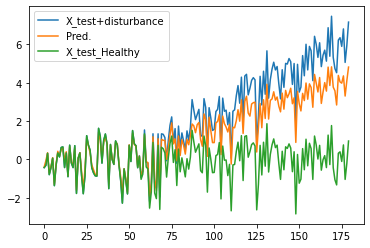

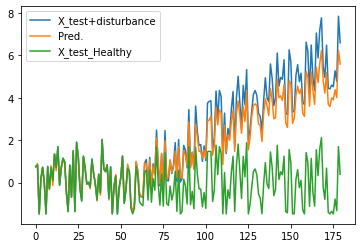

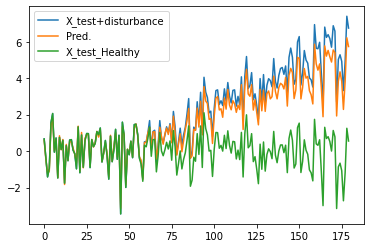

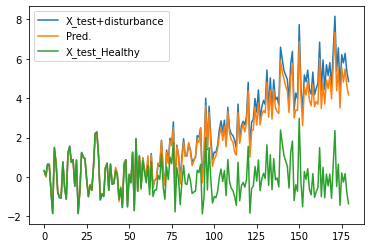

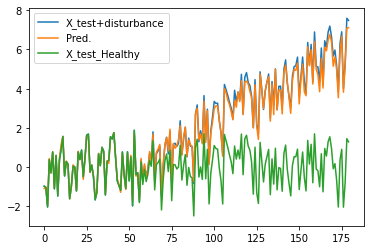

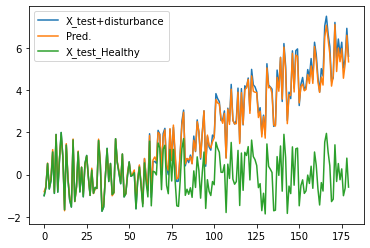

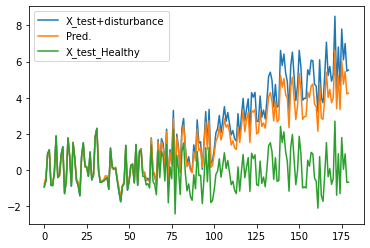

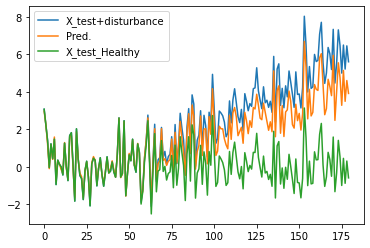

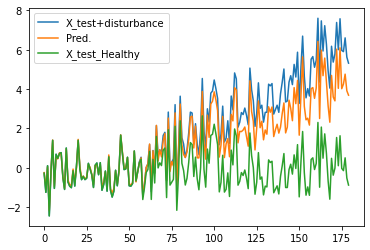

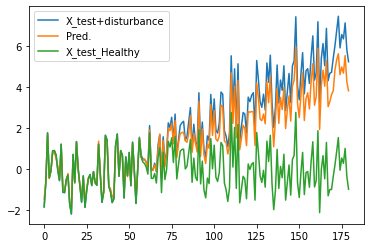

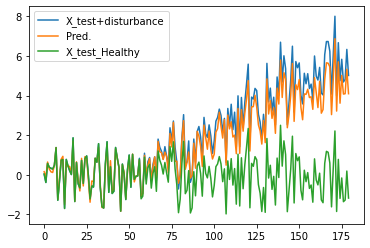

In [16]:
#predict = model.predict(x_test_noisy2)

for i in range(x_test_noisy2.shape[1]):
     plt.figure()
     plt.plot(x_test_noisy2[:200, i, 0])
     plt.plot(predict2[:200, i, 0])
     plt.plot(X_test2[:200, i, 0])
     plt.legend(["X_test+disturbance", "Pred.", "X_test_Healthy"])
     plt.show()

# **6. Sigmoid function**
Apply the Sigmoid function to the resulting MAE.
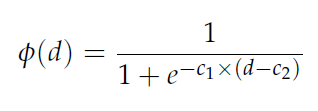
d is the reconstruction error(CI) which is difference between the original input data and the data reconstructed by the autoencoder. c1 is the slope of the sigmoid function and c2 determines the point where the sigmoid function is equal to 0.5.

6.180829210071152
0.9983628516866666


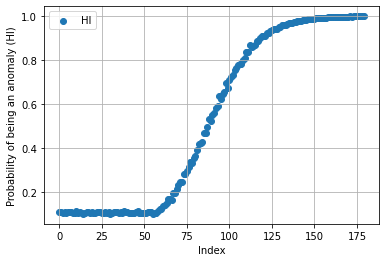

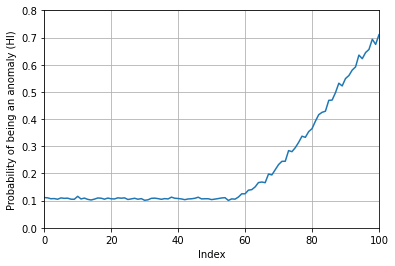

In [21]:
reconstruction_error = np.mean(np.abs(x_test_noisy2 - predict), axis=1)
print(np.max(reconstruction_error))
d = reconstruction_error
c1 = 1.4
c2 = 1.6

HIORG = 1/(1+ np.exp(-c1*(reconstruction_error-c2)))
HI = HIORG[:]
print(np.max(HI))

plt.scatter(range(len(HI)), HI)
#plt.scatter(range(len(d)), d)
plt.legend(["HI", "reconstruction error"])
#plt.scatter(range(len(reconstruction_error)), reconstruction_error)
plt.xlabel('Index')
plt.ylabel('Probability of being an anomaly (HI)')
plt.grid()
plt.savefig('C:\\Users\\dejol\\Desktop\\3 Jahr\\Semester6\\PA FS23\\Ressourcen\\Plots\\old_Linnoise.png', dpi=300)
plt.show()


plt.plot(range(len(HI)), HI)
plt.xlabel('Index')
plt.ylabel('Probability of being an anomaly (HI)')
plt.xlim(0, 100)
plt.ylim(0, 0.8)
plt.grid()
plt.show()


# **7. Gaussian-Process-Regressor**


1**2 + RBF(length_scale=0.5) + WhiteKernel(noise_level=1)


C:\Users\dejol\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\dejol\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


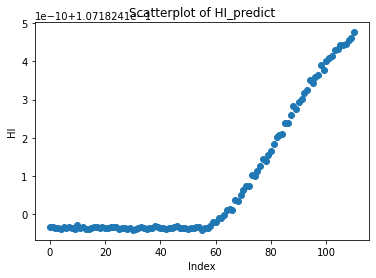

In [18]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor

#kernel_gpml = k1 + k2 
kernel = ConstantKernel(constant_value=1.0) + RBF(length_scale=0.5) + WhiteKernel() # + what you think models the system
print(kernel)
#print( polynomial_kernel(HI) )
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
 
# HI = [HI_0, HI_1, …, HI_100] # vector of estimated HI
# x: [HI_i until HI_(i+20)] from the HI vector
# y: [HI_(i+20+1) until HI_(i+20+11)]
X = HI[:20].reshape(20, 1)
y = HI[21:41]
gaussian_process.fit(X,y)
#gaussian_process.score(X,y)
 
# HI_new [HI_101, HI_102, …, HI_111]

HI_new = HIORG[:111]
HI_predict = gaussian_process.predict(HI_new)

plt.scatter(range(len(HI_predict)), HI_predict)
plt.xlabel('Index')
plt.ylabel('HI')
plt.title('Scatterplot of HI_predict')
plt.show()